In [39]:
# รายการประเภทที่ต้องนับ
categories = [
    'Nigeria', 'Norway', 'Pakistan', 'Australia'
]
lang = [
    'english', 'thai', 'russian', 'german'
]

count data

In [41]:
import pandas as pd
import glob
import os
from collections import defaultdict
from pprint import pprint


# กำหนดโฟลเดอร์ที่เก็บไฟล์ CSV
folder_path = "./data"  # เปลี่ยนตามตำแหน่งจริง
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))



# เก็บผลลัพธ์นับแยกตามภาษาและประเภท
summary = defaultdict(lambda: defaultdict(int))

for file in csv_files:
    # อ่านไฟล์
    df = pd.read_csv(file)
    df.columns = df.columns.str.replace('\ufeff', '').str.strip('"')

    # ตรวจสอบว่าคอลัมน์ที่เราต้องการมีอยู่ไหม
    col_name = df.columns[0]  # สมมุติว่าคอลัมน์ A คือคอลัมน์แรก

    # ตรวจสอบภาษา (จากชื่อไฟล์ เช่น -en.csv หรือ -th.csv)
    if '-en' in file:
        lang = 'english'
    elif '-th' in file:
        lang = 'thai'
    elif '-ru' in file:
        lang = 'russian'
    elif '-de' in file:
        lang = 'german'
    else:
        print('ไม่มีไฟล์')  # ถ้าไม่ตรงกับภาษาใดๆ ให้ข้ามไฟล์นี้
    # นับแต่ละประเภท
    for cat in categories:
        count = df[col_name].str.strip().eq(cat).sum()
        summary[lang][cat] += int(count)

# แสดงผลลัพธ์
data = {}

for lang in summary:
    temp = {}
    for cat in categories:
        temp[cat] = summary[lang][cat]  # นับแต่ละ category
    data[lang] = temp  # ใส่ทั้งหมดในรอบเดียว
print(data)


{'english': {'Nigeria': 20, 'Norway': 11, 'Pakistan': 16, 'Australia': 21}}


data to csv or excel

In [42]:
import csv

# สร้างไฟล์ CSV
header = ['category'] + sorted(next(iter(data.values())).keys())

# เขียนไฟล์
with open('summary.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    create_indent = [writer.writerow([''] * len(header)) for _ in range(5)]
    writer.writerow(header)

    for category, countries in data.items():
        row = [category] + [countries[country] for country in sorted(countries.keys())]
        writer.writerow(row)

plot graph

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


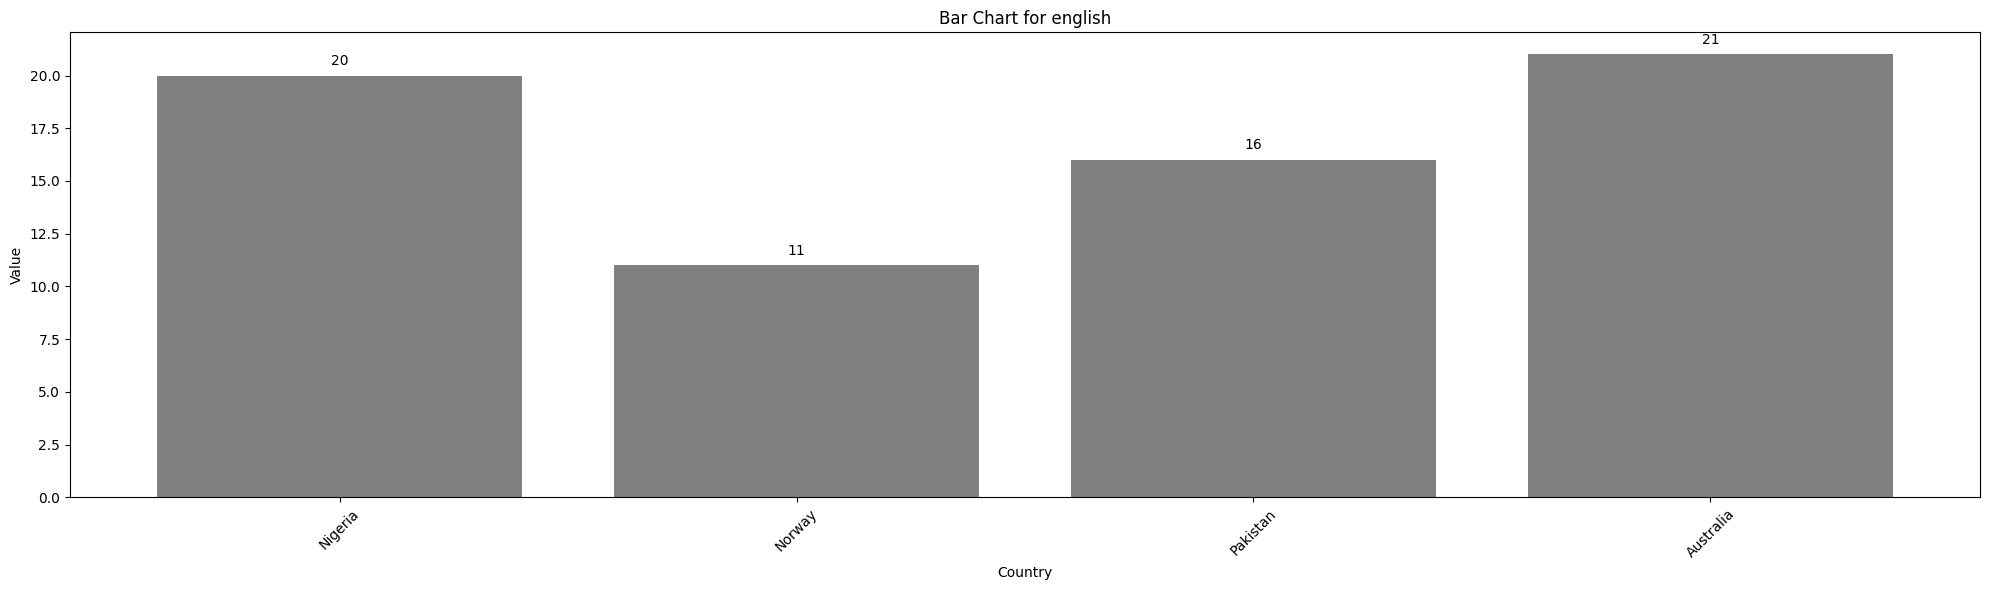

In [ ]:
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# ใช้ seaborn สำหรับกราฟแท่งกลุ่ม
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Country', y='Value', hue='Category', palette='pastel')

# แต่งกราฟ
plt.title('Comparison by Country and Category', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Category')
plt.tight_layout()
plt.show()
# # ดึงข้อมูล
# category = 'english'  # เปลี่ยนเป็นภาษาที่ต้องการ
# countries = list(data[category].keys())
# values = [int(v) for v in data[category].values()]

# # วาดกราฟแท่ง
# plt.figure(figsize=(20, 6))
# plt.bar(countries, values, color='grey')
# plt.xlabel('Country')
# plt.ylabel('Value')
# plt.title(f'Bar Chart for {category}')
# plt.xticks(rotation=45)
# for i, v in enumerate(values):
#     plt.text(i, v + 0.5, str(v), ha='center')

# plt.tight_layout()
# plt.show()
